# Thinkful Data Science Prep course 3.3.3

## Other distributions

So far, we’ve categorized data as either “normal” or “non-normal,” but there are many other probability distributions that also have useful characteristics for addressing particular statistical problems.  We won’t review all of them (see here for a [more comprehensive list](https://www.causascientia.org/math_stat/Dists/Compendium.pdf)) but here are brief introductions to some of the most common.

### Bernoulli

The **Bernoulli distribution** represents two possible outcomes of an event (such as a coin flip). Summarized by _p_, the probability of the outcome _k_.

The probability mass function for the Bernoulli distribution is:


\begin{equation}
  f(k|p)=\left\{
  \begin{array}{@{}ll@{}}
    p, & \text{if}\ k=1 \\
    1-p, & \text{if}\ k=0
  \end{array}\right.
\end{equation} 


Note that when a distribution is discrete (only takes integers), it has a probability _mass_ function, while a continuous distribution has a probability _density_ function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

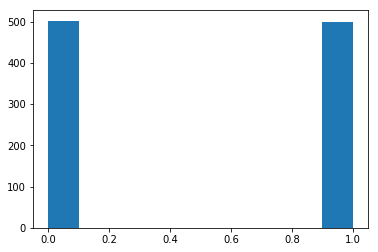

In [2]:
# Generate a bernoulli distribution with p =0.5.
bernoulli= np.random.binomial(1, .5, 1000)

#Plot a histogram.
plt.hist(bernoulli)

# Print the histogram
plt.show()

### Binomial:
A **binomial distribution** counts the number of successes when an event with two possible outcomes is repeated many times (such as many coin flips).  Summarized by _p_, the probability of getting _k_ successes during _n_ repetitions of the event.  The probability mass function is:

\begin{equation}
f(k| n,p)= \left(
  \begin{array}{@{}ll@{}}
    n \\
    k
  \end{array}\right) p^k (1-p)^{(n-k)}
\end{equation}

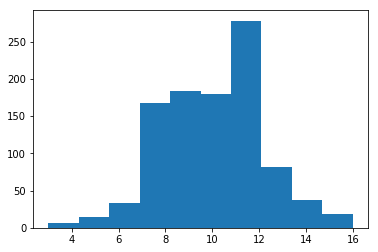

In [3]:
# Generate a binomial distribution with n=20 and p=0.5.
binomial = np.random.binomial(20, 0.5, 1000)

# Plot a histogram.
plt.hist(binomial)

# Print the histogram.
plt.show()

### Gamma
The **gamma distribution** represents the time until an event (such as lifespan until death), when the event starts out unlikely (few people die in youth), becomes more likely (more people die in old age), then becomes less likely again (few people die in extreme old age because most have already died).  Summarized by a shape parameter ($\alpha$) and an inverse-scale parameter ($\beta$). The probability density function is:

\begin{equation}
f(x|\alpha,\beta)=\frac{\beta^\alpha x^{\alpha-1} e^{-x\beta}} {\Gamma(\alpha)} \text {for } x \ge 0 \text { and } \alpha,\beta \ge0
\end{equation} 

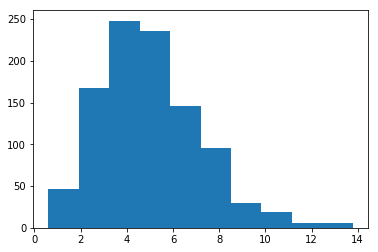

In [4]:
# Generate a gamma distribution with shape =5 and scale = 1
gamma = np.random.gamma(5,1, 1000)

# Plot a histogram.
plt.hist(gamma)

# Print the histogram.
plt.show()

### Poisson

The **poisson distribution** represents the number of times a given event (such as a phone call to a radio show) will occur during a given time interval.  Data can range from 0 (no phone calls during the time period) to approaching infinity (the phone never stopped ringing during the time period).  Summarized by $\lambda$ (“lambda”), the rate that events occur during a given time period.  The probability mass function is:

\begin{equation}
f(k|\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}
\end{equation} 



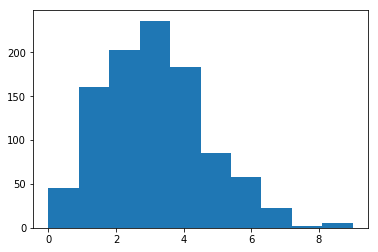

In [5]:
# Generate a Poisson distribution with lambda = 3
poisson = np.random.poisson(3, 1000)

# Plot a histogram.
plt.hist(poisson)

# Print the histogram.
plt.show()

Identifying whether data has a distribution with known statistical properties requires visualizing the data through histograms and QQ plots, as well as knowing the source of the data (counts, probabilities, times, etc). When collecting and exploring new data as a data scientist you’ll make heavy use of visualizations like the ones we use above.

## Conditional Distribution

Distributions can also be conditional. Consider an ecommerce site. For all of the customers, we  have a distribution of the amount that they have spent on the website. It may look something like this:

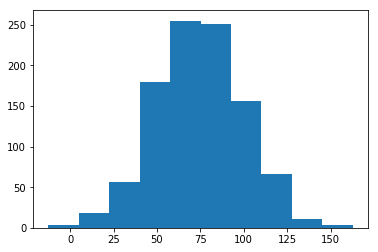

In [6]:
# Creating a data frame to hold the simulated ecommerce data, and populating it with a
# normally distributed variable with mean 75 and standard deviation 25.

ecommerce = pd.DataFrame()
ecommerce['spending'] = np.random.normal(75, 25, 1000)

# Plot a histogram.
plt.hist(ecommerce['spending'])
plt.show()

But let's say we're actually interested in a subset of that population, for instance visitors who visited the site more than twice. That data may look like this:


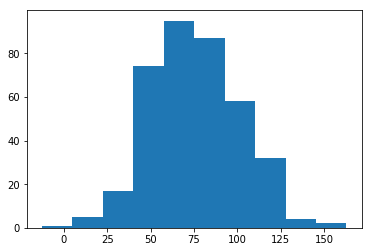

In [7]:
# Adding a variable with counts of number of times visiting the site.
ecommerce['visit_count'] = np.random.randint(0, 5, 1000)

# Selecting only the cases where the visit count is greater than two and plotting those.
plt.hist(ecommerce[ecommerce['visit_count'] > 2]['spending'])
plt.show()

This is a conditional distribution, with the condition being that the user visited more than twice. [This is an example of how we can use information about one aspect of a data set to inform another.](http://xkcd.com/795/)